In [1]:
import numpy as np

In [2]:
import pandas as pd

In [31]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
MLBElo = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\Proj4\data\mlb_elo.csv")

In [4]:
MLBElo

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-10,2020,1,d,LAD,SDP,1598.290926,1525.832831,0.635558,0.364442,...,NaN,NaN,NaN,NaN,0.635030,0.364970,NaN,NaN,NaN,NaN
1,2020-10-10,2020,1,d,ATL,FLA,1543.508397,1482.006574,0.615867,0.384133,...,NaN,NaN,NaN,NaN,0.629976,0.370024,NaN,NaN,NaN,NaN
2,2020-10-09,2020,1,d,SDP,LAD,1525.832831,1598.290926,0.364442,0.635558,...,NaN,NaN,NaN,NaN,0.364970,0.635030,NaN,NaN,NaN,NaN
3,2020-10-09,2020,1,d,TBD,NYY,1566.075394,1557.931446,0.515622,0.484378,...,NaN,NaN,NaN,NaN,0.507634,0.492366,NaN,NaN,NaN,NaN
4,2020-10-09,2020,1,d,OAK,HOU,1547.618027,1542.711978,0.509413,0.490587,...,NaN,NaN,NaN,NaN,0.482885,0.517115,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220941,1871-05-09,1871,0,NaN,TRO,ATL,1450.000000,1451.483000,0.532359,0.467641,...,NaN,NaN,NaN,NaN,0.522460,0.477540,1448.525,1452.958,5.0,9.0
220942,1871-05-08,1871,0,NaN,CHC,CL1,1450.000000,1451.943000,0.531700,0.468300,...,NaN,NaN,NaN,NaN,0.528402,0.471598,1451.256,1450.687,14.0,12.0
220943,1871-05-06,1871,0,NaN,RC1,CL1,1450.000000,1448.754000,0.536268,0.463732,...,NaN,NaN,NaN,NaN,0.532974,0.467026,1446.810,1451.943,4.0,12.0
220944,1871-05-05,1871,0,NaN,WS3,ATL,1450.000000,1450.000000,0.534484,0.465516,...,NaN,NaN,NaN,NaN,0.534484,0.465516,1448.517,1451.483,18.0,20.0


In [5]:
# where are the values missing
print("*****In the MLBElo set*****")
print(MLBElo.isna().sum())

*****In the MLBElo set*****
date                 0
season               0
neutral              0
playoff         219291
team1                0
team2                0
elo1_pre             0
elo2_pre             0
elo_prob1            0
elo_prob2            0
elo1_post           20
elo2_post           20
rating1_pre          0
rating2_pre          0
pitcher1            56
pitcher2            56
pitcher1_rgs     33759
pitcher2_rgs     33759
pitcher1_adj     34440
pitcher2_adj     34439
rating_prob1         0
rating_prob2         0
rating1_post        20
rating2_post        20
score1              20
score2              20
dtype: int64


In [6]:
# See types of features
MLBElo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220946 entries, 0 to 220945
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          220946 non-null  object 
 1   season        220946 non-null  int64  
 2   neutral       220946 non-null  int64  
 3   playoff       1655 non-null    object 
 4   team1         220946 non-null  object 
 5   team2         220946 non-null  object 
 6   elo1_pre      220946 non-null  float64
 7   elo2_pre      220946 non-null  float64
 8   elo_prob1     220946 non-null  float64
 9   elo_prob2     220946 non-null  float64
 10  elo1_post     220926 non-null  float64
 11  elo2_post     220926 non-null  float64
 12  rating1_pre   220946 non-null  float64
 13  rating2_pre   220946 non-null  float64
 14  pitcher1      220890 non-null  object 
 15  pitcher2      220890 non-null  object 
 16  pitcher1_rgs  187187 non-null  float64
 17  pitcher2_rgs  187187 non-null  float64
 18  pitc

In [7]:
# Make new dataframe for 'cleaned' data
cleanMLB = MLBElo

In [8]:
#Remove columns per report
del cleanMLB['date']
del cleanMLB['season']
del cleanMLB['pitcher1']
del cleanMLB['pitcher2']
del cleanMLB['elo_prob1']
del cleanMLB['elo_prob2']


In [9]:
cleanMLB.head()

,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,1,d,LAD,SDP,1598.290926,1525.832831,NaN,NaN,1606.065971,1534.038131,NaN,NaN,NaN,NaN,0.635030,0.364970,NaN,NaN,NaN,NaN
1,1,d,ATL,FLA,1543.508397,1482.006574,NaN,NaN,1541.398290,1475.108982,NaN,NaN,NaN,NaN,0.629976,0.370024,NaN,NaN,NaN,NaN
2,1,d,SDP,LAD,1525.832831,1598.290926,NaN,NaN,1534.038131,1606.065971,NaN,NaN,NaN,NaN,0.364970,0.635030,NaN,NaN,NaN,NaN
3,1,d,TBD,NYY,1566.075394,1557.931446,NaN,NaN,1562.032965,1562.805994,NaN,NaN,NaN,NaN,0.507634,0.492366,NaN,NaN,NaN,NaN
4,1,d,OAK,HOU,1547.618027,1542.711978,NaN,NaN,1532.981409,1552.953477,NaN,NaN,NaN,NaN,0.482885,0.517115,NaN,NaN,NaN,NaN


In [10]:
#Testing one-hot encoding for team name
test = pd.get_dummies(cleanMLB)
test

,neutral,elo1_pre,elo2_pre,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,...,team2_TRO,team2_WOR,team2_WS3,team2_WS4,team2_WS5,team2_WS6,team2_WS7,team2_WS8,team2_WS9,team2_WSN
0,1,1598.290926,1525.832831,NaN,NaN,1606.065971,1534.038131,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,1543.508397,1482.006574,NaN,NaN,1541.398290,1475.108982,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,1525.832831,1598.290926,NaN,NaN,1534.038131,1606.065971,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,1566.075394,1557.931446,NaN,NaN,1562.032965,1562.805994,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,1547.618027,1542.711978,NaN,NaN,1532.981409,1552.953477,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220941,0,1450.000000,1451.483000,1448.525,1452.958,1450.000000,1451.483000,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
220942,0,1450.000000,1451.943000,1451.256,1450.687,1450.000000,1451.943000,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
220943,0,1450.000000,1448.754000,1446.810,1451.943,1450.000000,1448.754000,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
220944,0,1450.000000,1450.000000,1448.517,1451.483,1450.000000,1450.000000,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [11]:
cleanMLB = test
cleanMLB.head()

,neutral,elo1_pre,elo2_pre,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,...,team2_TRO,team2_WOR,team2_WS3,team2_WS4,team2_WS5,team2_WS6,team2_WS7,team2_WS8,team2_WS9,team2_WSN
0,1,1598.290926,1525.832831,NaN,NaN,1606.065971,1534.038131,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,1543.508397,1482.006574,NaN,NaN,1541.398290,1475.108982,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,1525.832831,1598.290926,NaN,NaN,1534.038131,1606.065971,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,1566.075394,1557.931446,NaN,NaN,1562.032965,1562.805994,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,1547.618027,1542.711978,NaN,NaN,1532.981409,1552.953477,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Get column names
list(cleanMLB.columns) 

['neutral',
 'elo1_pre',
 'elo2_pre',
 'elo1_post',
 'elo2_post',
 'rating1_pre',
 'rating2_pre',
 'pitcher1_rgs',
 'pitcher2_rgs',
 'pitcher1_adj',
 'pitcher2_adj',
 'rating_prob1',
 'rating_prob2',
 'rating1_post',
 'rating2_post',
 'score1',
 'score2',
 'playoff_c',
 'playoff_d',
 'playoff_l',
 'playoff_w',
 'team1_ANA',
 'team1_ARI',
 'team1_ATL',
 'team1_BAL',
 'team1_BFN',
 'team1_BL1',
 'team1_BL2',
 'team1_BL4',
 'team1_BOS',
 'team1_BR1',
 'team1_BR2',
 'team1_BR4',
 'team1_BSP',
 'team1_CHC',
 'team1_CHW',
 'team1_CIN',
 'team1_CL1',
 'team1_CL2',
 'team1_CL3',
 'team1_CL5',
 'team1_CL6',
 'team1_CLE',
 'team1_CN1',
 'team1_CN3',
 'team1_COL',
 'team1_DET',
 'team1_DTN',
 'team1_ELI',
 'team1_FLA',
 'team1_FW1',
 'team1_HOU',
 'team1_HR1',
 'team1_IN1',
 'team1_IN2',
 'team1_IN3',
 'team1_KC2',
 'team1_KCN',
 'team1_KCR',
 'team1_KEO',
 'team1_LAD',
 'team1_LS1',
 'team1_LS2',
 'team1_MID',
 'team1_MIL',
 'team1_MIN',
 'team1_ML1',
 'team1_ML3',
 'team1_NH1',
 'team1_NY2',
 '

In [13]:
#Move "score1, score2" to front of columns for easy access
score1 = cleanMLB['score1']
score2 = cleanMLB['score2']

cleanMLB.drop(labels=['score1'], axis=1,inplace = True)
cleanMLB.drop(labels=['score2'], axis=1,inplace = True)

cleanMLB.insert(0, 'score2', score2)
cleanMLB.insert(0, 'score1', score1)

cleanMLB

,score1,score2,neutral,elo1_pre,elo2_pre,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,...,team2_TRO,team2_WOR,team2_WS3,team2_WS4,team2_WS5,team2_WS6,team2_WS7,team2_WS8,team2_WS9,team2_WSN
0,NaN,NaN,1,1598.290926,1525.832831,NaN,NaN,1606.065971,1534.038131,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,1,1543.508397,1482.006574,NaN,NaN,1541.398290,1475.108982,NaN,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,1,1525.832831,1598.290926,NaN,NaN,1534.038131,1606.065971,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,1,1566.075394,1557.931446,NaN,NaN,1562.032965,1562.805994,NaN,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,1,1547.618027,1542.711978,NaN,NaN,1532.981409,1552.953477,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220941,5.0,9.0,0,1450.000000,1451.483000,1448.525,1452.958,1450.000000,1451.483000,NaN,...,0,0,0,0,0,0,0,0,0,0
220942,14.0,12.0,0,1450.000000,1451.943000,1451.256,1450.687,1450.000000,1451.943000,NaN,...,0,0,0,0,0,0,0,0,0,0
220943,4.0,12.0,0,1450.000000,1448.754000,1446.810,1451.943,1450.000000,1448.754000,NaN,...,0,0,0,0,0,0,0,0,0,0
220944,18.0,20.0,0,1450.000000,1450.000000,1448.517,1451.483,1450.000000,1450.000000,NaN,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# where are the values missing
print("*****In the MLBElo set*****")
print(cleanMLB.isna().sum())

*****In the MLBElo set*****
score1       20
score2       20
neutral       0
elo1_pre      0
elo2_pre      0
             ..
team2_WS6     0
team2_WS7     0
team2_WS8     0
team2_WS9     0
team2_WSN     0
Length: 199, dtype: int64


In [15]:
# Fill missing values with 0 rating
cleanMLB.fillna(0, inplace=True)

In [16]:
#following:
# https://notebooks.azure.com/keshanmuga/projects/2018-Linear-Regression/html/Example%20Linear%20Regression%20-%20Cricket%20Chirps.ipynb
X = cleanMLB.iloc[:, 2:].values  # Matrix of independent variables -- From column 2 (neutral) to last column
y = cleanMLB.iloc[:, 0:1].values    # Matrix of dependent variables -- From column 0 (score1) to 1 (score2)



In [17]:
X

array([[1.00000000e+00, 1.59829093e+03, 1.52583283e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.54350840e+03, 1.48200657e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.52583283e+03, 1.59829093e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.45000000e+03, 1.44875400e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.45000000e+03, 1.45000000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.45000000e+03, 1.45000000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [18]:
# From: https://www.wintellect.com/creating-a-simple-linear-regression-machine-learning-model-with-scikit-learn/
#Make train/test data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cleanMLB, test_size=0.2, random_state=42)

In [19]:
train_set_copy = train_set.copy()

In [20]:
#Exploratory Data Analysis
train_set_copy.describe()

,score1,score2,neutral,elo1_pre,elo2_pre,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,...,team2_TRO,team2_WOR,team2_WS3,team2_WS4,team2_WS5,team2_WS6,team2_WS7,team2_WS8,team2_WS9,team2_WSN
count,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,...,176756.000000,176756.00000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000,176756.000000
mean,4.651559,4.405599,0.000221,1503.880351,1503.446461,1503.706774,1503.322932,1503.873722,1503.451381,42.659192,...,0.000102,0.00056,0.000096,0.000017,0.000102,0.000074,0.000147,0.001143,0.003072,0.018800
std,3.279993,3.248725,0.014852,37.835486,38.045018,40.685388,40.895747,38.103111,38.305391,18.515678,...,0.010091,0.02366,0.009807,0.004120,0.010091,0.008576,0.012127,0.033786,0.055341,0.135818
min,0.000000,0.000000,0.000000,1347.367000,1334.931000,0.000000,0.000000,1347.527000,1335.004000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1479.020000,1478.801750,1478.927500,1478.766000,1479.038750,1478.806759,45.847000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,1505.685000,1505.340500,1505.661500,1505.349500,1505.786500,1505.462000,48.850000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,6.000000,0.000000,1529.664000,1529.253000,1529.754000,1529.321000,1529.614811,1529.271000,52.183365,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,49.000000,1.000000,1656.636000,1657.986000,1657.618000,1657.986000,1658.006000,1659.344000,77.076000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# useful function for finding correlations between each of the columns
train_set_copy.corr()

,score1,score2,neutral,elo1_pre,elo2_pre,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,...,team2_TRO,team2_WOR,team2_WS3,team2_WS4,team2_WS5,team2_WS6,team2_WS7,team2_WS8,team2_WS9,team2_WSN
score1,1.000000,0.092115,-0.010151,0.077167,-0.106462,0.112836,-0.129600,0.076985,-0.106264,-0.097792,...,0.016285,0.007472,0.020038,0.007974,0.026712,0.018812,0.017218,0.022942,0.049501,-0.014505
score2,0.092115,1.000000,-0.003965,-0.112664,0.096023,-0.137955,0.132194,-0.112905,0.096257,-0.055796,...,0.021866,-0.003986,0.009075,-0.001360,0.005988,-0.000462,-0.003094,-0.005718,0.007419,-0.013025
neutral,-0.010151,-0.003965,1.000000,0.007944,0.012361,-0.239586,-0.231832,0.007745,0.012841,-0.009643,...,-0.000150,-0.000352,-0.000146,-0.000061,-0.000150,-0.000127,-0.000180,-0.000502,-0.000825,-0.002056
elo1_pre,0.077167,-0.112664,0.007944,1.000000,-0.061976,0.925569,-0.062406,0.996824,-0.062729,0.108062,...,-0.010989,-0.001316,-0.013629,-0.003370,0.000781,-0.001780,-0.009135,0.009047,0.007079,-0.001520
elo2_pre,-0.106462,0.096023,0.012361,-0.061976,1.000000,-0.061627,0.927592,-0.062933,0.996881,0.059663,...,-0.010862,-0.028599,-0.013890,-0.008706,-0.019688,-0.019548,-0.031606,-0.067058,-0.091291,-0.022833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
team2_WS6,0.018812,-0.000462,-0.000127,-0.001780,-0.019548,-0.001370,-0.018407,-0.001779,-0.019437,-0.019759,...,-0.000087,-0.000203,-0.000084,-0.000035,-0.000087,1.000000,-0.000104,-0.000290,-0.000476,-0.001187
team2_WS7,0.017218,-0.003094,-0.000180,-0.009135,-0.031606,-0.007964,-0.029843,-0.009055,-0.031429,-0.027945,...,-0.000122,-0.000287,-0.000119,-0.000050,-0.000122,-0.000104,1.000000,-0.000410,-0.000673,-0.001679
team2_WS8,0.022942,-0.005718,-0.000502,0.009047,-0.067058,0.008948,-0.062669,0.008997,-0.066604,-0.077931,...,-0.000341,-0.000801,-0.000332,-0.000139,-0.000341,-0.000290,-0.000410,1.000000,-0.001878,-0.004682
team2_WS9,0.049501,0.007419,-0.000825,0.007079,-0.091291,0.007603,-0.085538,0.007035,-0.090658,-0.127895,...,-0.000560,-0.001314,-0.000544,-0.000229,-0.000560,-0.000476,-0.000673,-0.001878,1.000000,-0.007684


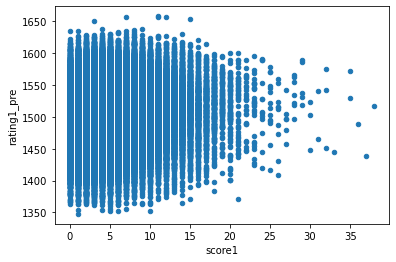

In [22]:
#Simple scatter plot example
train_set_copy.plot.scatter(x='score1', y='rating1_pre')

In [23]:
#Save the correlation result for sorting
taincorr = train_set_copy.corr()

In [24]:
#Sort by score1
result1 = taincorr.sort_values(by=['score1'], ascending=False)
result1

,score1,score2,neutral,elo1_pre,elo2_pre,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,...,team2_TRO,team2_WOR,team2_WS3,team2_WS4,team2_WS5,team2_WS6,team2_WS7,team2_WS8,team2_WS9,team2_WSN
score1,1.000000,0.092115,-0.010151,0.077167,-0.106462,0.112836,-0.129600,0.076985,-0.106264,-0.097792,...,0.016285,0.007472,0.020038,0.007974,0.026712,0.018812,0.017218,0.022942,0.049501,-0.014505
rating_prob1,0.125558,-0.145627,-0.010259,0.716531,-0.714929,0.668018,-0.665155,0.719089,-0.717248,0.045264,...,0.000140,0.017991,0.000459,0.003480,0.014106,0.011437,0.014984,0.049452,0.064723,0.011615
elo1_post,0.112836,-0.137955,-0.239586,0.925569,-0.061627,1.000000,0.072629,0.922712,-0.062441,0.106296,...,-0.010340,-0.000850,-0.012350,-0.002948,0.001040,-0.001370,-0.007964,0.008948,0.007603,-0.001080
rating1_post,0.112044,-0.137608,-0.238123,0.923568,-0.062595,0.997268,0.070966,0.926582,-0.063637,0.104489,...,-0.010265,-0.000831,-0.012249,-0.002925,0.001206,-0.001369,-0.007902,0.008906,0.007561,-0.001398
score2,0.092115,1.000000,-0.003965,-0.112664,0.096023,-0.137955,0.132194,-0.112905,0.096257,-0.055796,...,0.021866,-0.003986,0.009075,-0.001360,0.005988,-0.000462,-0.003094,-0.005718,0.007419,-0.013025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
elo2_pre,-0.106462,0.096023,0.012361,-0.061976,1.000000,-0.061627,0.927592,-0.062933,0.996881,0.059663,...,-0.010862,-0.028599,-0.013890,-0.008706,-0.019688,-0.019548,-0.031606,-0.067058,-0.091291,-0.022833
pitcher2_rgs,-0.117972,-0.028857,-0.008145,0.043009,0.123286,0.044470,0.124154,0.042332,0.121885,0.957881,...,-0.023254,-0.054549,-0.022599,-0.009493,-0.023254,-0.019762,-0.027949,-0.077941,-0.127912,0.056442
rating_prob2,-0.125558,0.145627,0.010259,-0.716531,0.714929,-0.668018,0.665155,-0.719089,0.717248,-0.045264,...,-0.000140,-0.017991,-0.000459,-0.003480,-0.014106,-0.011437,-0.014984,-0.049452,-0.064723,-0.011615
rating2_post,-0.128884,0.131773,-0.230177,-0.063170,0.925591,0.071168,0.997313,-0.064216,0.928388,0.063821,...,-0.009709,-0.026621,-0.013093,-0.008271,-0.018608,-0.018323,-0.029702,-0.062302,-0.085022,-0.015255


In [25]:
#Sort by score2
result2 = taincorr.sort_values(by=['score2'], ascending=False)
result2

,score1,score2,neutral,elo1_pre,elo2_pre,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,...,team2_TRO,team2_WOR,team2_WS3,team2_WS4,team2_WS5,team2_WS6,team2_WS7,team2_WS8,team2_WS9,team2_WSN
score2,0.092115,1.000000,-0.003965,-0.112664,0.096023,-0.137955,0.132194,-0.112905,0.096257,-0.055796,...,0.021866,-0.003986,0.009075,-0.001360,0.005988,-0.000462,-0.003094,-0.005718,0.007419,-0.013025
rating_prob2,-0.125558,0.145627,0.010259,-0.716531,0.714929,-0.668018,0.665155,-0.719089,0.717248,-0.045264,...,-0.000140,-0.017991,-0.000459,-0.003480,-0.014106,-0.011437,-0.014984,-0.049452,-0.064723,-0.011615
elo2_post,-0.129600,0.132194,-0.231832,-0.062406,0.927592,0.072629,1.000000,-0.063225,0.924618,0.063890,...,-0.009911,-0.026805,-0.013173,-0.008254,-0.018554,-0.018407,-0.029843,-0.062669,-0.085538,-0.020568
rating2_post,-0.128884,0.131773,-0.230177,-0.063170,0.925591,0.071168,0.997313,-0.064216,0.928388,0.063821,...,-0.009709,-0.026621,-0.013093,-0.008271,-0.018608,-0.018323,-0.029702,-0.062302,-0.085022,-0.015255
rating2_pre,-0.106264,0.096257,0.012841,-0.062729,0.996881,-0.062441,0.924618,-0.063965,1.000000,0.058997,...,-0.010650,-0.028376,-0.013787,-0.008697,-0.019739,-0.019437,-0.031429,-0.066604,-0.090658,-0.017103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
elo1_pre,0.077167,-0.112664,0.007944,1.000000,-0.061976,0.925569,-0.062406,0.996824,-0.062729,0.108062,...,-0.010989,-0.001316,-0.013629,-0.003370,0.000781,-0.001780,-0.009135,0.009047,0.007079,-0.001520
rating1_pre,0.076985,-0.112905,0.007745,0.996824,-0.062933,0.922712,-0.063225,1.000000,-0.063965,0.106644,...,-0.010882,-0.001292,-0.013511,-0.003362,0.000970,-0.001779,-0.009055,0.008997,0.007035,-0.001858
rating1_post,0.112044,-0.137608,-0.238123,0.923568,-0.062595,0.997268,0.070966,0.926582,-0.063637,0.104489,...,-0.010265,-0.000831,-0.012249,-0.002925,0.001206,-0.001369,-0.007902,0.008906,0.007561,-0.001398
elo1_post,0.112836,-0.137955,-0.239586,0.925569,-0.061627,1.000000,0.072629,0.922712,-0.062441,0.106296,...,-0.010340,-0.000850,-0.012350,-0.002948,0.001040,-0.001370,-0.007964,0.008948,0.007603,-0.001080


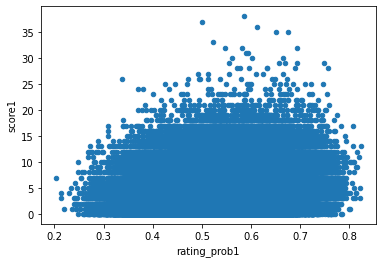

In [26]:
train_set_copy.plot.scatter(x='rating_prob1', y='score1')

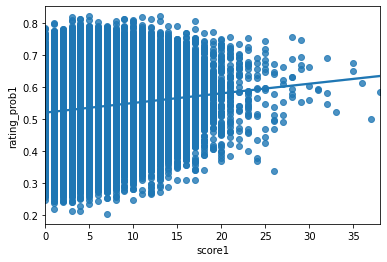

In [27]:
import seaborn as sns
# Regression plot
sns.regplot('score1', # Horizontal axis
           'rating_prob1', # Vertical axis
           data=train_set_copy)

In [28]:
#Building the Model
train_set_full = train_set.copy()

train_set = train_set.drop(["score1"], axis=1)

test_set_full = test_set.copy()

test_set = test_set.drop(["score1"], axis=1)

In [29]:
train_labels = train_set_copy["score1"]

In [32]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression()

In [33]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [ 8.64776475e-01 -9.27021928e-02 -1.85137353e+00  2.42267538e-01
  1.86894811e+00 -2.59653975e-01  1.09480309e+00  5.20195584e-01
 -2.09853712e-02  1.84302571e-02 -2.95750804e-03  7.39725667e-04
  5.97339634e-01 -5.97339634e-01 -1.09957092e+00 -5.15410871e-01
  1.05156467e+00  1.41500998e-01  3.18513577e-02 -1.75107004e-03
  5.78776108e-01  7.07093932e-01  6.76339793e-01  5.91703957e-01
  7.23486514e-01  3.99113015e-01  9.66951849e-01 -1.23715713e+01
  6.80295650e-01 -4.04180546e+00 -1.69565705e+00  4.83918595e-01
  1.23303935e+00  6.52280612e-01  5.75673822e-01  6.07303953e-01
 -1.13077829e+00  3.08404343e-01  8.57288655e-01  2.50440486e-01
  7.89774502e-01  6.09441912e-01  2.66570375e-01  7.47573509e-01
  8.84042671e-01  6.40010733e-01  8.04247379e-01 -2.94778972e+00
  5.76135398e-01 -1.99536802e+00  5.51310859e-01  7.83750196e-01
  1.03620823e+00 -2.28953566e-01  7.25332623e-01  6.78408923e-01
 -2.84901740e-02  6.52446798e-01 -1.41111071e+00  5.75185500e-01
  3.423734

In [34]:
#prediction from an input
score1_pred = lin_reg.predict(test_set)
score1_pred

array([ 7.73768975,  4.87448344,  6.59622956, ...,  2.01954741,
        2.631134  , -0.33086398])

In [35]:
#compare the predictions to the test set [score1]
print(score1_pred)
print(test_set_full["score1"])

[ 7.73768975  4.87448344  6.59622956 ...  2.01954741  2.631134
 -0.33086398]
80829      7.0
22816      4.0
208113     9.0
99799     13.0
111520     6.0
          ... 
44157      7.0
30654     12.0
12584      3.0
50576      0.0
2908       1.0
Name: score1, Length: 44190, dtype: float64


In [36]:
#calculates the coefficient of determination or the r^2 of the model
r2_score(test_set_full["score1"], score1_pred)

0.8056817104185288

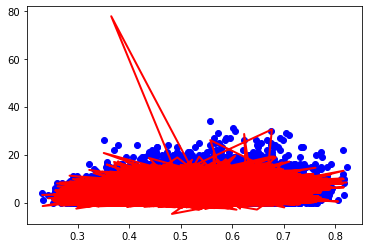

In [41]:
import matplotlib.pyplot as plt
plt.scatter(test_set_full["rating_prob1"], test_set_full["score1"],  color='blue')
plt.plot(test_set_full["rating_prob1"], score1_pred, color='red', linewidth=2)

In [42]:
score1_pred

array([ 7.73768975,  4.87448344,  6.59622956, ...,  2.01954741,
        2.631134  , -0.33086398])